# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [36]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [37]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [40]:
X_train_scaled.shape

(426, 30)

## Constructing a Neural Network in Keras

In [41]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

# Importing our optimizer

from keras.optimizers import Adam

In [42]:
model = Sequential()

inputs = X_train.shape[1]
hiddens = inputs

model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1))

In [43]:
adam = Adam()
model.compile(optimizer=adam, loss='mean_squared_error')

In [44]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=20)

Train on 426 samples, validate on 143 samples
Epoch 1/20
426/426 [==============================] - 0s 525us/step - loss: 619.0696 - val_loss: 345.3351
Epoch 2/20
426/426 [==============================] - 0s 31us/step - loss: 326.4134 - val_loss: 75.5486
Epoch 3/20
426/426 [==============================] - 0s 31us/step - loss: 181.0832 - val_loss: 33.3206
Epoch 4/20
426/426 [==============================] - 0s 35us/step - loss: 78.8400 - val_loss: 9.1047
Epoch 5/20
426/426 [==============================] - 0s 33us/step - loss: 35.4207 - val_loss: 3.4089
Epoch 6/20
426/426 [==============================] - 0s 37us/step - loss: 21.7492 - val_loss: 3.1091
Epoch 7/20
426/426 [==============================] - 0s 38us/step - loss: 15.6054 - val_loss: 2.8131
Epoch 8/20
426/426 [==============================] - 0s 35us/step - loss: 11.5416 - val_loss: 6.4764
Epoch 9/20
426/426 [==============================] - 0s 33us/step - loss: 12.2574 - val_loss: 2.2269
Epoch 10/20
426/426 [=======

In [45]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, verbose=0, batch_size=200)

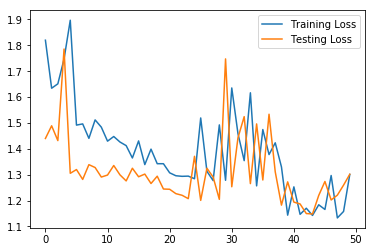

In [46]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend();

In [47]:
np.hstack([model.predict(X_test), y_test.reshape(143, 1)])[:20]

array([[ 0.33067146,  1.        ],
       [ 0.27049461,  1.        ],
       [ 0.88852131,  1.        ],
       [ 0.22691931,  0.        ],
       [ 0.67986882,  1.        ],
       [-0.91709125,  1.        ],
       [-0.56838405,  1.        ],
       [ 0.4359304 ,  1.        ],
       [-1.0141238 ,  0.        ],
       [ 1.40452397,  1.        ],
       [-4.48176765,  0.        ],
       [ 0.84834874,  1.        ],
       [-0.36916527,  1.        ],
       [ 1.41819966,  1.        ],
       [-0.81879222,  1.        ],
       [-0.39682183,  1.        ],
       [ 0.78260624,  0.        ],
       [ 0.79608738,  1.        ],
       [ 3.14982438,  1.        ],
       [ 1.38798344,  1.        ]])

In [24]:
model.evaluate(X_test, y_test)

143/143 [==============================] - 0s 28us/step


4.338342291700257

## Tensorflow

In [25]:
import tensorflow as tf

### Tensorflow as a graph constructor

In [51]:
slot_1 = tf.placeholder(tf.int64, shape=(3, 2))

slot_2 = tf.placeholder(tf.int64, shape=(2, 3))

ans = tf.matmul(slot_1, slot_2)

In [58]:
with tf.Session() as sess:
    result = sess.run(ans, feed_dict={slot_1:[[3, 3],[2, 2],[1, 1]], slot_2:[[1, 2, 3], [1, 1, 1]]})

In [59]:
print(result)

[[ 6  9 12]
 [ 4  6  8]
 [ 2  3  4]]


### Neural Network

In [49]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.


In [50]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_scaled, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.mean_squared_error(y_test.reshape(-1, 1), classes)

0.6083916083916084